<a href="https://colab.research.google.com/github/iewnewnew/SC3000/blob/main/SC3000_Balancing_a_Pole_on_a_Cart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Balancing a Pole on a Cart
Members and contribution: 


Tran Que An (U2120910G): Make the first version of notebook

Lee Wen Wei (U2120178J): Ensure correctness and logic of code

Sandhiya Sukumaran (U2120682B): Format Jupyter notebook and added comments

## Installing dependencies:

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing dependencies

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

## Set up environment

Here we will be setting up the CartPole environment. For our pole balancing game, we will be using:


learning rate = 0.15

discount factor = 0.99


epsilon = 0.15


no of training episodes = 10000

In [ ]:
env = gym.make("CartPole-v1") # set up Car tPole environment

alpha = 0.15 # learning rate
gamma = 0.99 # discount factor
epsilon = 0.15 # exploration rate to generate randomness
no_episodes = 10000 # number of training episodes


We have set the number of observations and window size manually. 

np_array_win_size is the “steps” based upon cart position, cart velocity, pole angle, and then pole velocity 


We referenced to an article from Medium. (Fakhry, 2020)





In [ ]:
action_space = env.action_space.n # number of actions
observation_space = [30, 30, 50, 50] # number of each observations
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1]) 

upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50) / 1.] # define maximum values of cart position, cart velocity, pole angle, and pole velocity
lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50) / 1.] # define minimum values of cart position, cart velocity, pole angle, and pole velocity
q_table = np.random.uniform(low=0, high=1, size=(observation_space + [action_space])) # initialize Q-table with random values range from 0 to 1
q_table.shape

(30, 30, 50, 50, 2)

We used a discretize_observation function  to discretize the values of an observation. Similar values will be grouped as one hence reducing the state space and making the Q-table smaller and much simpler. 

Referenced from an article in Medium. (Fakhry, 2020)

In [ ]:

def discretize_observation(observation):
    discrete_observation = observation/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_observation.astype(int))

## Task 1: Development of an RL agent

The choose_action function returns a random action when the random number generated is less than the epsilon and returns the best action from the Q-table when the random number generated is more than the epsilon

In [ ]:
## This function is used to choose action at specific state
def choose_action(observation):
    if (np.random.random() < epsilon): ## allow some randomness in training process
        return env.action_space.sample() 
    else:
        return np.argmax(q_table[observation])

The update_q_table function fills the Q-table using the Q-value equation from the lecture as seen below

In [ ]:
def update_q_table(observation, action, reward, new_observation):
    q_current = q_table[observation + (action,)]
    q_next = np.max(q_table[new_observation])
    q_table[observation][action] = q_current + alpha * (reward + gamma * q_next - q_current)

The model is then trained for 10000 episodes to produce a more optimal Q-table

In [ ]:
def train_model(no_episodes):
    env = gym.make("CartPole-v1")
    for i in range(no_episodes):
        #initialize intial state
        observation = env.reset()
        observation = discretize_observation(observation)
        done = False 
        while not done:
            # Choose action base on current observation
            action = choose_action(observation)
            
            # Take action
            new_observation, reward, done, info = env.step(action)
            new_observation = discretize_observation(new_observation)
            
            # Update q-table
            update_q_table(observation, action, reward, new_observation)
            observation = new_observation
    print('Finished training!')

In [ ]:
train_model(no_episodes)

Finished training!


In [ ]:
print(q_table)

[[[[[7.54845156e-02 6.73859206e-01]
    [5.77365014e-01 4.01063430e-01]
    [7.96470906e-01 9.72461368e-01]
    ...
    [6.02507185e-01 8.21908468e-01]
    [7.97474214e-01 9.08974408e-01]
    [1.78205419e-01 9.87382107e-01]]

   [[6.49008621e-01 5.12575317e-01]
    [6.22115002e-01 6.88549789e-01]
    [8.22297636e-01 4.99120749e-02]
    ...
    [6.61717687e-01 3.11825503e-01]
    [2.27769378e-01 4.29946914e-01]
    [1.07167026e-01 5.27297092e-01]]

   [[9.07290659e-01 9.61485792e-01]
    [2.06474089e-01 1.08692336e-01]
    [2.30727189e-01 7.66317319e-01]
    ...
    [7.81042290e-01 5.34361479e-02]
    [6.45381970e-01 4.44631773e-01]
    [4.06171718e-01 7.04963211e-01]]

   ...

   [[1.17350694e-01 5.82415834e-01]
    [5.11530397e-01 8.43770416e-01]
    [5.24723632e-01 7.82359516e-01]
    ...
    [4.59046074e-01 3.98706663e-01]
    [9.30339391e-01 7.70327707e-01]
    [5.81048384e-01 6.76508189e-01]]

   [[8.37644471e-01 9.57612063e-01]
    [5.60128207e-01 3.35969712e-01]
    [2.49555290e

For task 1, the observation and chosen action is shown below:

In [ ]:
observation = env.reset()
print("Observation: ", observation)
observation = discretize_observation(observation)
action = choose_action(observation)
print("Action: ", action)

Observation:  [-0.04356015  0.04907359  0.00481876 -0.0425738 ]
Action:  0


## Task 2: Demonstrate the effectiveness of the RL agent

In contrast to the choose_action function, the select_action function returns the best action based on the trained Q-table

In [ ]:
## This function is used to choose action after obtaining a fine Q-table
def select_action(observation): 
    return np.argmax(q_table[observation])

As required by Task 2, we will now test the effectiveness of the agent we developed in Task 1 by playing the game for 100 episodes. 

In [ ]:
testing_result = []
for i in range(100):
    observation = env.reset()
    observation = discretize_observation(observation)
    cumulative_reward = 0
    done = False
    while not done:
        # Choose action base on current observation
        action = select_action(observation)
              
        # Take action
        new_observation, reward, done, info = env.step(action)
        new_observation = discretize_observation(new_observation)
              
        observation = new_observation
        cumulative_reward += reward
    testing_result.append(cumulative_reward)

The cumulative reward is plotted for each round as shown below:

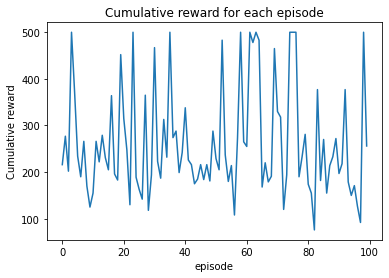

In [ ]:
testing_result = np.array(testing_result)
plt.plot(testing_result)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

The average reward over the 100 episodes is printed below and its reward is greater than 195, hence the agent is effective.

In [ ]:
print("Average cumulative reward:", testing_result.mean())
print("Is my agent good enough?", testing_result.mean() > 195)

Average cumulative reward: 262.94
Is my agent good enough? True


There will be different results when running again as there is eplison which is probability of a random action which can cause slightly different results.
This would be fixed with our following improvement by improving episodes to reduce the variance of the randomness. However, this cannot guarantee an improvement because randomness still exist, but with reduced variance due to more episodes.

## Task 3: Render one episode played by the agent


The rendered episode played by the agent is shown below:

In [ ]:
def show_video():
  mp4list = glob.glob('./*.mp4')
  print(mp4list)
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" controls style="height: 500px;"><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

In [ ]:
env_2 = RecordVideo(gym.make("CartPole-v1"), "./")
observation = env_2.reset()
total_reward = 0
observation = discretize_observation(observation)
while True:
  env_2.render()
  action = select_action(observation)
  new_observation, reward, done, info = env_2.step(action)
  new_observation = discretize_observation(new_observation)
  observation = new_observation 
  total_reward += reward
  if done: 
    break;
print(total_reward)    
env_2.close()
show_video()

227.0
['./rl-video-episode-0.mp4']


## Additional part: Improving the agent


In task 2, we trained the agent with 10000 episodes. Could we make it better by training it with more episodes? Now, we train the agent with another 20000 episodes.

In [ ]:
train_model(20000) ## train the agent with another 20000 episodes

Finished training!


In [ ]:
## Test the effectiveness of the agent after training the agent with another 20000 episodes
testing_result_2 = []
for i in range(100):
    observation = env.reset()
    observation = discretize_observation(observation)
    cumulative_reward = 0
    done = False
    while not done:
        # Choose action base on current observation
        action = select_action(observation)
              
        # Take action
        new_observation, reward, done, info = env.step(action)
        new_observation = discretize_observation(new_observation)
              
        observation = new_observation
        cumulative_reward += reward
    testing_result_2.append(cumulative_reward)

testing_result_2 = np.array(testing_result_2)

print("Old average cumulative reward: ", testing_result.mean())
print("New average cumulative reward: ", testing_result_2.mean())

Old average cumulative reward:  262.94
New average cumulative reward:  468.01


As we can see, after training with another 20000 episodes, the average cumulative reward increases. Hence, we can conclude that training the agent with more episodes makes the agent more accurate.

## References


Fakhry, A. (2020, November 13). Using Q-learning for OpenAI's cartpole-V1. Medium. Retrieved March 19, 2023, from https://medium.com/swlh/using-q-learning-for-openais-cartpole-v1-4a216ef237df 
